In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"device : {device}")

device : cuda


In [3]:
# Create weight and bias
weight = 0.3
bias = 0.9

# Create X and y
start = 1
end = 3
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

print(f"Shape X and y : {X.shape}, {y.shape}")
print(f"{X[:10]}")
print(f"{y[:10]}")

Shape X and y : torch.Size([200, 1]), torch.Size([200, 1])
tensor([[1.0000],
        [1.0100],
        [1.0200],
        [1.0300],
        [1.0400],
        [1.0500],
        [1.0600],
        [1.0700],
        [1.0800],
        [1.0900]])
tensor([[1.2000],
        [1.2030],
        [1.2060],
        [1.2090],
        [1.2120],
        [1.2150],
        [1.2180],
        [1.2210],
        [1.2240],
        [1.2270]])


In [4]:
# split data into 80% training , 20% testing
data_spilt = int(0.8 * len(X))
X_train, y_train = X[:data_spilt], y[:data_spilt]
X_test, y_test = X[data_spilt:], y[data_spilt:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([160, 1]),
 torch.Size([160, 1]),
 torch.Size([40, 1]),
 torch.Size([40, 1]))

In [5]:
def plot_prediction(
        train_data = X_train,
        train_label = y_train,
        test_data = X_test,
        test_label = y_test,
        predictions = None
):
    plt.figure(figsize=(10, 7))
    
    plt.scatter(train_data, train_label, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_label, c="g", s=4, label="Testing data")
    
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
    
    plt.legend(prop={"size": 14})

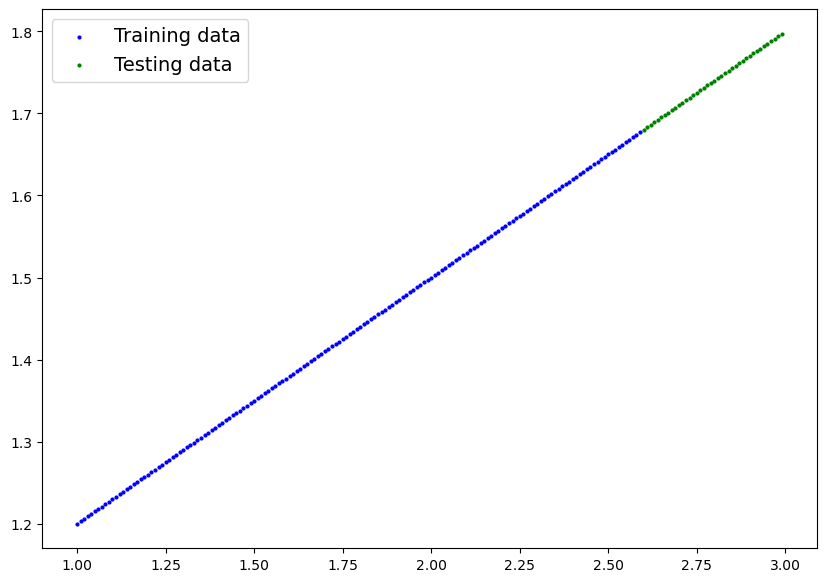

In [6]:
plot_prediction()

In [7]:
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        # self.linear = nn.Linear(1, 1)
    
    def forward(self, x):
        
        y = self.weight * x + self.bias
        # y = self.linear(x)
        return y


In [9]:
model_0 = LinearRegression().to(device)
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(model_0.parameters(), lr=1e-2)

In [11]:
torch.manual_seed(42)

epochs = 300
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    pred = model_0(X_train)
    loss = loss_func(pred, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    ### Perform testing every 20 epochs
    if epoch % 20 == 0:
        model_0.eval()
        with torch.inference_mode():
            pred_test = model_0(X_test)
            test_loss = loss_func(pred_test, y_test)
            print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")
            

Epoch: 0 | Train loss: 0.029 | Test loss: 0.060
Epoch: 20 | Train loss: 0.022 | Test loss: 0.045
Epoch: 40 | Train loss: 0.014 | Test loss: 0.029
Epoch: 60 | Train loss: 0.030 | Test loss: 0.002
Epoch: 80 | Train loss: 0.030 | Test loss: 0.002
Epoch: 100 | Train loss: 0.030 | Test loss: 0.002
Epoch: 120 | Train loss: 0.030 | Test loss: 0.002
Epoch: 140 | Train loss: 0.030 | Test loss: 0.002
Epoch: 160 | Train loss: 0.030 | Test loss: 0.002
Epoch: 180 | Train loss: 0.030 | Test loss: 0.002
Epoch: 200 | Train loss: 0.030 | Test loss: 0.002
Epoch: 220 | Train loss: 0.030 | Test loss: 0.002
Epoch: 240 | Train loss: 0.030 | Test loss: 0.002
Epoch: 260 | Train loss: 0.030 | Test loss: 0.002
Epoch: 280 | Train loss: 0.030 | Test loss: 0.002


In [12]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[1.7360],
        [1.7393],
        [1.7426],
        [1.7459],
        [1.7492],
        [1.7526],
        [1.7559],
        [1.7592],
        [1.7625],
        [1.7659],
        [1.7692],
        [1.7725],
        [1.7758],
        [1.7792],
        [1.7825],
        [1.7858],
        [1.7891],
        [1.7924],
        [1.7958],
        [1.7991],
        [1.8024],
        [1.8057],
        [1.8091],
        [1.8124],
        [1.8157],
        [1.8190],
        [1.8224],
        [1.8257],
        [1.8290],
        [1.8323],
        [1.8356],
        [1.8390],
        [1.8423],
        [1.8456],
        [1.8489],
        [1.8523],
        [1.8556],
        [1.8589],
        [1.8622],
        [1.8656]], device='cuda:0')

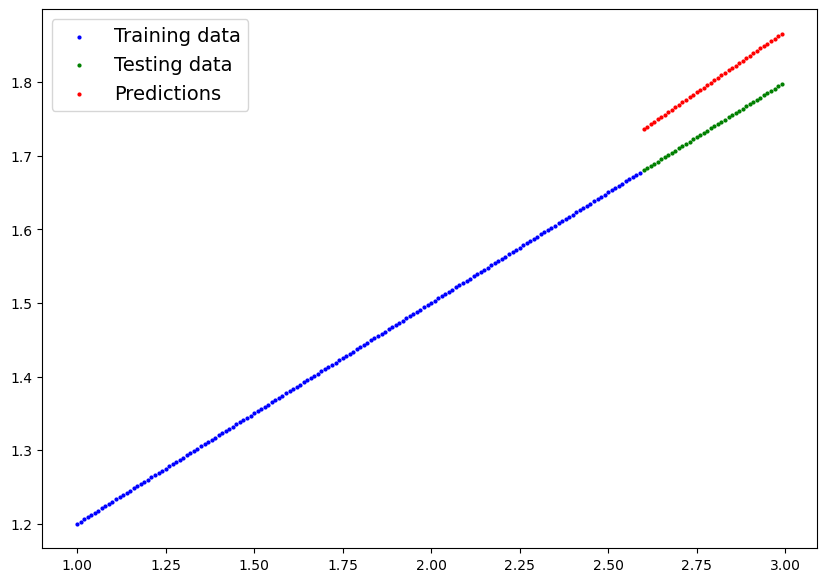

In [13]:
plot_prediction(predictions= y_preds.cpu())

In [14]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "exercise_model_0"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models\exercise_model_0


In [15]:
loaded_model = LinearRegression()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegression()

In [16]:
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [17]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3323], device='cuda:0')),
             ('bias', tensor([0.8719], device='cuda:0'))])